## Data Collection:

In [2]:
# getting the data and reading it
!pip install -q wget
import wget
import pandas as pd
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ09.xlsx')
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ03.xlsx')
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ07a.xlsx')

You should consider upgrading via the 'c:\users\rolle\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


100% [..........................................................................] 7230446 / 7230446

## Data Profiling

In [1]:
import pandas as pd

# function to read data as a dataframe
def read_data(filename):
    '''
    This function reads the excel data.
    Argument:
    filename -- indicates the real filename that needs to be read as a dataframe
    Return: Dataframe
    '''
    df = pd.read_excel(filename, sheet_name='Data 1', header=None) 
    return df

In [2]:
df_first = read_data('EQ09.xlsx')
df_first.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ09 - Employed persons by Ind...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Industry division of main job: ANZSIC (2006) R...,Occupation major group of main job: ANZSCO (20...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-08-01 00:00:00,Males,"Agriculture, Forestry and Fishing",Managers,176.543735,10.977368,9781.46825,175.265252,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that rows above fourth index (3) are irrelevant, so we need to remove those rows. Also, the header row is at the fourth index (3), so it needs to be reinstated as a header. In the given dataset, only the data till the first eight columns are relevant remaining columns are all NaNs. Furthermore, the numbers are in the thousand number format, it needs to converted back to the original figure for easy analysis. For ease, renaming the existing columns needs to be done. Also, only industry relevant to the tech sector needs to be filtered out as the dataframe contains the data for all industries.

In [3]:
df_second = read_data('EQ03.xlsx')
df_second.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ03 - Employed persons by Gre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Greater capital city and rest of state (GCCSA)...,Industry division of main job: ANZSIC (2006) R...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],"Agriculture, Forestry and Fishing",7.205404,0.920765,389.063036,11.774114,NaN,NaN,NaN,NaN,NaN,NaN
5,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],Mining,4.83253,0,184.71542,0,NaN,NaN,NaN,NaN,NaN,NaN
6,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],Manufacturing,196.509513,6.155991,7933.446386,141.814127,NaN,NaN,NaN,NaN,NaN,NaN


Similar to the previous dataframe, rows above index number 3 are extraneous and the header is present in the index number 3. Similarly, the data till the first eight columns are relevant as remaining all are NaNs. The numbers are in the thousand form. In this dataframe too, renaming of columns can make interpretation easy. Filtering based on relevant tech industries need to be performed too. The additional operation required for this dataset is the merging of different places to one single state as states are divided into greater capital and other names such as Greater Sydney, Rest of NSW, Balance of New South Wales etc. Thus, these divisions need to be replaced by the corresponding unionised state name.

In [4]:
df_third = read_data('EQ07a.xlsx')
df_third.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ07a - Employed persons by Ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Age,Occupation sub-major group of main job: ANZSCO...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-08-01 00:00:00,Males,15-24 years,"Chief Executives, General Managers and Legisla...",1.131601,0.018432,44.921948,0.341481,NaN,NaN,NaN,NaN,NaN,NaN
5,1986-08-01 00:00:00,Males,15-24 years,Farmers and Farm Managers,11.28849,0.968397,554.892095,7.203802,NaN,NaN,NaN,NaN,NaN,NaN
6,1986-08-01 00:00:00,Males,15-24 years,Specialist Managers,5.652841,0.351048,258.145457,4.972967,NaN,NaN,NaN,NaN,NaN,NaN


For this dataset too, transformations similar to the above two datasets need to be applied as the issues are similar to the above datasets. The only new step required for this dataset is that we need to only extract the occupations relevant to the tech secctor.

## Data Wrangling

Based on the issues identified in the profiling steps, we perform necessary steps in this stage for corresponding datasets.

In [5]:
# function to perform preprocessing of the datasets
def wrangler(df, col_index, list_column, relevant):  
    '''
    This function performs the basic preprocessing steps identified in the profiling stage for each dataset.
    Argument:
    df -- the dataframe that needs to be transformed
    col_index -- the column index of the industry or occupation
    list-column -- list of names that are used to rename the dataframe
    relevant -- list of strings that indicate corresponding tech relevant industries or occupations
    Return: Dataframe
    '''
    df.columns =df.loc[3] # making index 3 row as a header 
    df.drop(df.index[0:4], inplace=True) # deleting the rows before the fith rows
    df = df.iloc[:,0:8] # selecting the columns till index 7
    
    # selecting relevant tech industries/ occupations
    df = df.loc[df.iloc[:,col_index].isin(relevant)]
        
    # resetting the index
    df.reset_index(drop=True, inplace=True)
    
    # converting the numbers that are formatted in thousands back to the full figure
    df.iloc[:,4:] *= 1000
    
    # renaming columns
    df.columns = list_column
    
    # removing time part from the date column
    df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    
    # rounding the figures to two decimal places
    cols = df.iloc[:,4:].columns.tolist()
    df.loc[:,cols] = df.loc[:,cols].astype(float).round(2)
    return df

In [6]:
# transforming the first dataframe
list_column = ['date', 'sex', 'industry', 'occupation_type', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
# selecting only 'Information Media and Telecommunications' and 'Professional, Scientific and Technical Services' as they are 
# tech sectors according to the job types present in them as seen in the labour market information portal
relevant = ['Information Media and Telecommunications', 'Professional, Scientific and Technical Services']
df1 = wrangler(df_first, 2, list_column, relevant)
df1

,date,sex,industry,occupation_type,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1986-08-01,Males,Information Media and Telecommunications,Managers,8750.92,358.61,393923.09,8549.3
1,1986-08-01,Males,Information Media and Telecommunications,Professionals,16016.24,2682.05,671085.29,41412.7
2,1986-08-01,Males,Information Media and Telecommunications,Technicians and Trades Workers,44097.86,1074.04,1586869.62,23248.24
3,1986-08-01,Males,Information Media and Telecommunications,Community and Personal Service Workers,1378.45,378.09,33222.68,3514.82
4,1986-08-01,Males,Information Media and Telecommunications,Clerical and Administrative Workers,18377.96,1991.27,644091.13,44768.38
...,...,...,...,...,...,...,...,...
4470,2021-11-01,Females,"Professional, Scientific and Technical Services",Community and Personal Service Workers,2654.11,1561.66,90933.12,42400.16
4471,2021-11-01,Females,"Professional, Scientific and Technical Services",Clerical and Administrative Workers,81570.55,67161.46,3092617.47,1187265.53
4472,2021-11-01,Females,"Professional, Scientific and Technical Services",Sales Workers,7431.24,5615.66,304802.49,82732.87
4473,2021-11-01,Females,"Professional, Scientific and Technical Services",Machinery Operators and Drivers,0.0,783.93,0.0,12542.86


In [7]:
# transforming the second dataframe
list_column = ['date', 'sex', 'state', 'industry', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
df2 = wrangler(df_second, 3, list_column, relevant)
df2

,date,sex,state,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1984-11-01,Males,Sydney (old standards) [1960-1991],Information Media and Telecommunications,27690.93,1742.43,1065716.63,21381.56
1,1984-11-01,Males,Sydney (old standards) [1960-1991],"Professional, Scientific and Technical Services",38093.27,2713.12,1645080.28,36042.31
2,1984-11-01,Males,Balance of New South Wales (old standards) [19...,Information Media and Telecommunications,8353.81,908.81,298494.63,12110.36
3,1984-11-01,Males,Balance of New South Wales (old standards) [19...,"Professional, Scientific and Technical Services",9977.04,841.21,443496.68,9498.14
4,1984-11-01,Males,Melbourne (old standards) [1960-1991],Information Media and Telecommunications,24177.08,1454.22,826990.11,30536.18
...,...,...,...,...,...,...,...,...
8318,2021-11-01,Females,Rest of Tas.,"Professional, Scientific and Technical Services",2109.25,1380.93,81204.57,21959.47
8319,2021-11-01,Females,Northern Territory,Information Media and Telecommunications,313.59,148.97,12663.77,4053.74
8320,2021-11-01,Females,Northern Territory,"Professional, Scientific and Technical Services",2516.88,982.13,89088.32,12233.59
8321,2021-11-01,Females,Australian Capital Territory,Information Media and Telecommunications,900.36,338.14,35630.74,6392.88


In [8]:
# additional steps for the second dataframe
def state_unifier(df, dict_state_names):
    for i in dict_state_names:
        df.loc[df['state'].str.contains(dict_state_names[i]), 'state'] = i
    return df

dict_state_names = {'NSW':'Sydney|New South Wales|NSW', 'Victoria':'Melbourne|Victoria|Vic',\
                    'Queensland':'Brisbane|Queensland|Qld', 'South Australia':'Adelaide|South Australia|SA',\
                   'Western Australia':'Perth|Western Australia|WA', 'Tasmania':'Tasmania|Hobart|Tas'}

df2 = state_unifier(df2, dict_state_names)
df2

,date,sex,state,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1984-11-01,Males,NSW,Information Media and Telecommunications,27690.93,1742.43,1065716.63,21381.56
1,1984-11-01,Males,NSW,"Professional, Scientific and Technical Services",38093.27,2713.12,1645080.28,36042.31
2,1984-11-01,Males,NSW,Information Media and Telecommunications,8353.81,908.81,298494.63,12110.36
3,1984-11-01,Males,NSW,"Professional, Scientific and Technical Services",9977.04,841.21,443496.68,9498.14
4,1984-11-01,Males,Victoria,Information Media and Telecommunications,24177.08,1454.22,826990.11,30536.18
...,...,...,...,...,...,...,...,...
8318,2021-11-01,Females,Tasmania,"Professional, Scientific and Technical Services",2109.25,1380.93,81204.57,21959.47
8319,2021-11-01,Females,Northern Territory,Information Media and Telecommunications,313.59,148.97,12663.77,4053.74
8320,2021-11-01,Females,Northern Territory,"Professional, Scientific and Technical Services",2516.88,982.13,89088.32,12233.59
8321,2021-11-01,Females,Australian Capital Territory,Information Media and Telecommunications,900.36,338.14,35630.74,6392.88


In [9]:
# checking the grouped count
df2.groupby('state').count()

,date,sex,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
state,,,,,,,
Australian Capital Territory,596,596,596,596,596,596,596
NSW,1192,1192,1192,1192,1192,1192,1192
Northern Territory,596,596,596,596,596,596,596
Queensland,1192,1192,1192,1192,1192,1192,1192
South Australia,1180,1180,1180,1180,1180,1180,1180
Tasmania,1192,1192,1192,1192,1192,1192,1192
Victoria,1192,1192,1192,1192,1192,1192,1192
Western Australia,1183,1183,1183,1183,1183,1183,1183


In [10]:
# merging the data containing common state names, date, sex and industry
df2 = df2.groupby(['industry','sex','state','date']).sum().reset_index()
df2

,industry,sex,state,date,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,Information Media and Telecommunications,Females,Australian Capital Territory,1984-11-01,851.96,174.53,34154.69,3846.44
1,Information Media and Telecommunications,Females,Australian Capital Territory,1985-02-01,1056.33,159.04,37681.56,2111.94
2,Information Media and Telecommunications,Females,Australian Capital Territory,1985-05-01,1091.45,354.85,39117.19,6360.39
3,Information Media and Telecommunications,Females,Australian Capital Territory,1985-08-01,1108.43,421.27,40989.47,7781.85
4,Information Media and Telecommunications,Females,Australian Capital Territory,1985-11-01,1089.79,412.13,39782.32,7600.21
...,...,...,...,...,...,...,...,...
4763,"Professional, Scientific and Technical Services",Males,Western Australia,2020-11-01,56439.13,10239.60,2436917.57,151856.09
4764,"Professional, Scientific and Technical Services",Males,Western Australia,2021-02-01,53549.04,6706.12,2251251.39,117383.47
4765,"Professional, Scientific and Technical Services",Males,Western Australia,2021-05-01,54813.30,8918.03,2377963.36,178207.33
4766,"Professional, Scientific and Technical Services",Males,Western Australia,2021-08-01,57193.03,8335.82,2214821.40,144666.50


In [11]:
# transforming the third dataset
# before transforming we need to identify the relevant tech occupations
df_third.iloc[4:,3].unique()

array(['Chief Executives, General Managers and Legislators',
       'Farmers and Farm Managers', 'Specialist Managers',
       'Hospitality, Retail and Service Managers',
       'Arts and Media Professionals',
       'Business, Human Resource and Marketing Professionals',
       'Design, Engineering, Science and Transport Professionals',
       'Education Professionals', 'Health Professionals',
       'ICT Professionals', 'Legal, Social and Welfare Professionals',
       'Engineering, ICT and Science Technicians',
       'Automotive and Engineering Trades Workers',
       'Construction Trades Workers',
       'Electrotechnology and Telecommunications Trades Workers',
       'Food Trades Workers', 'Skilled Animal and Horticultural Workers',
       'Other Technicians and Trades Workers',
       'Health and Welfare Support Workers', 'Carers and Aides',
       'Hospitality Workers', 'Protective Service Workers',
       'Sports and Personal Service Workers',
       'Office Managers and Prog

In [12]:
# from all occupations we only select relevant tech occupations
# specifying the relevant tech occupations
relevant = ['Design, Engineering, Science and Transport Professionals', 'ICT Professionals',\
               'Engineering, ICT and Science Technicians', 'Electrotechnology and Telecommunications Trades Workers',\
               'Other Technicians and Trades Workers', 'Technicians and Trades Workers nfd']
list_column = ['date', 'sex', 'age', 'occupation', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
df3 = wrangler(df_third, 3, list_column, relevant)
df3

,date,sex,age,occupation,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1986-08-01,Males,15-24 years,"Design, Engineering, Science and Transport Pro...",9849.23,1354.51,372743.85,34163.41
1,1986-08-01,Males,15-24 years,ICT Professionals,5876.32,225.97,223685.97,5013.43
2,1986-08-01,Males,15-24 years,"Engineering, ICT and Science Technicians",14483.46,479.38,523348.51,11243.11
3,1986-08-01,Males,15-24 years,Electrotechnology and Telecommunications Trade...,37797.12,1046.02,1443568.56,28599.69
4,1986-08-01,Males,15-24 years,Other Technicians and Trades Workers,36264.93,834.17,1402367.9,18480.18
...,...,...,...,...,...,...,...,...
8696,2021-11-01,Females,55-64 years,Other Technicians and Trades Workers,9888.48,10005.74,387859.72,168327.97
8697,2021-11-01,Females,65 years and over,"Design, Engineering, Science and Transport Pro...",2564.25,0.0,93721.0,0.0
8698,2021-11-01,Females,65 years and over,ICT Professionals,0.0,741.81,0.0,11127.2
8699,2021-11-01,Females,65 years and over,"Engineering, ICT and Science Technicians",0.0,713.85,0.0,6495.02


For our analysis, we can use these three dataframes in isolation since all necessary information is present in a single dataframe so each dataframe can act as a standalone dataframe for analysis. This also removes the need to perform dataframe joining, and the join between these datasets is possible through one to one relationship, so there is no need to undertake extra overheads from the join operation.

## Missing Value Checking:

In [13]:
# counting the missing values for each dataset
list_df = [df1, df2, df3]
for i in range(len(list_df)):
    print(list_df[i].isnull().sum())
    print('\n')

date                  0
sex                   0
industry              0
occupation_type       0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64


industry              0
sex                   0
state                 0
date                  0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64


date                  0
sex                   0
age                   0
occupation            0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64




It is seen that no missing values are present in our datasets.

Next, we are generating a dataframe that represents the total figures for the relevant industries so that we can perform forecasting based on this dataframe later in the analysis.

## Dataframe Generation:

In [14]:
# for this purpose we use the first dataset
from itertools import cycle
import copy
df_forecast = copy.deepcopy(df1)

def forecast_maker(df, industry):
    '''
    This function takes a dataframe and convert that dataframe with columns containing necessary values for forecasting.
    Argument:
    df -- the dataframe that is used to generate forecast dataframe 
    industry -- the name of the industry to generate the forecast dataframe for that industry
    Return: Dataframe
    '''
    
    # selecting the relevant columns
    df = df[['date', 'industry', 'fulltime_employees', 'parttime_employees']]
    # selecting the industry type
    df = df.loc[df['industry'] == industry]
    # calculating the total employees
    df.loc[:,'total_employees'] =  df['fulltime_employees'] + df['parttime_employees']
    # merging the data to get a unique value for a particular date 
    df = df.groupby(['date']).sum().reset_index()
    # creating a new column quarter that represents the quarter in a year 
    quarter = cycle([3,4,1,2])
    df['quarter'] = [next(quarter) for x in range(len(df))]
    # selecing only the columns that are required for forecasting
    df = df[['quarter','date','total_employees']]
    return df

In [15]:
# getting the forecast suitable dataframe for both industries
df_forecast_imt = forecast_maker(df_forecast, 'Information Media and Telecommunications')
df_forecast_imt

,quarter,date,total_employees
0,3,1986-08-01,170173.78
1,4,1986-11-01,164834.66
2,1,1987-02-01,163059.79
3,2,1987-05-01,165700.53
4,3,1987-08-01,165406.40
...,...,...,...
137,4,2020-11-01,192747.04
138,1,2021-02-01,201291.00
139,2,2021-05-01,181544.52
140,3,2021-08-01,184316.39


In [16]:
df_forecast_pst = forecast_maker(df_forecast, 'Professional, Scientific and Technical Services')
df_forecast_pst

,quarter,date,total_employees
0,3,1986-08-01,286949.54
1,4,1986-11-01,302028.94
2,1,1987-02-01,314842.21
3,2,1987-05-01,311554.84
4,3,1987-08-01,313082.86
...,...,...,...
137,4,2020-11-01,1177417.79
138,1,2021-02-01,1227343.38
139,2,2021-05-01,1233672.80
140,3,2021-08-01,1192597.44


## Exploratory Data Analysis:

In [17]:
# our analysis is focused more on the total number of employees rather than studying fulltime and parttime employees in isolation
# defining a function that adds new columns that are helpful in exploratory data analysis such as total employee column etc.
def get_extra_cols(df):
    '''
    This function adds new calculated columns based on the existing data.
    Argument:
    df -- the dataframe that needs the extra columns
    Return: Dataframe
    '''
    # creating a total employee column
    df.loc[:,'total_employees'] =  df['fulltime_employees'] + df['parttime_employees']
    # creating a total hour column
    df.loc[:,'total_hours'] =  df['fulltime_hours'] + df['parttime_hours']
    # creating an hour per employee column
    df['hours_per_employee'] = df.apply(lambda x: 0 if x['total_employees'] == 0 else float(x['total_hours']/x['total_employees']), axis=1)
    # rounding the values of newly created columns
    cols = df.iloc[:,8:].columns.tolist()
    df.loc[:,cols] = df.loc[:,cols].astype(float).round(2)
    return df

df1 = get_extra_cols(df1)
df2 = get_extra_cols(df2)
df3 = get_extra_cols(df3)

**Value Count:** To get an overview of the datasets.

In [18]:
df1.shape

(4475, 11)

The first dataframe contains 4475 rows and 11 columns. Next we need to identify the number of unique values present in the selected columns.

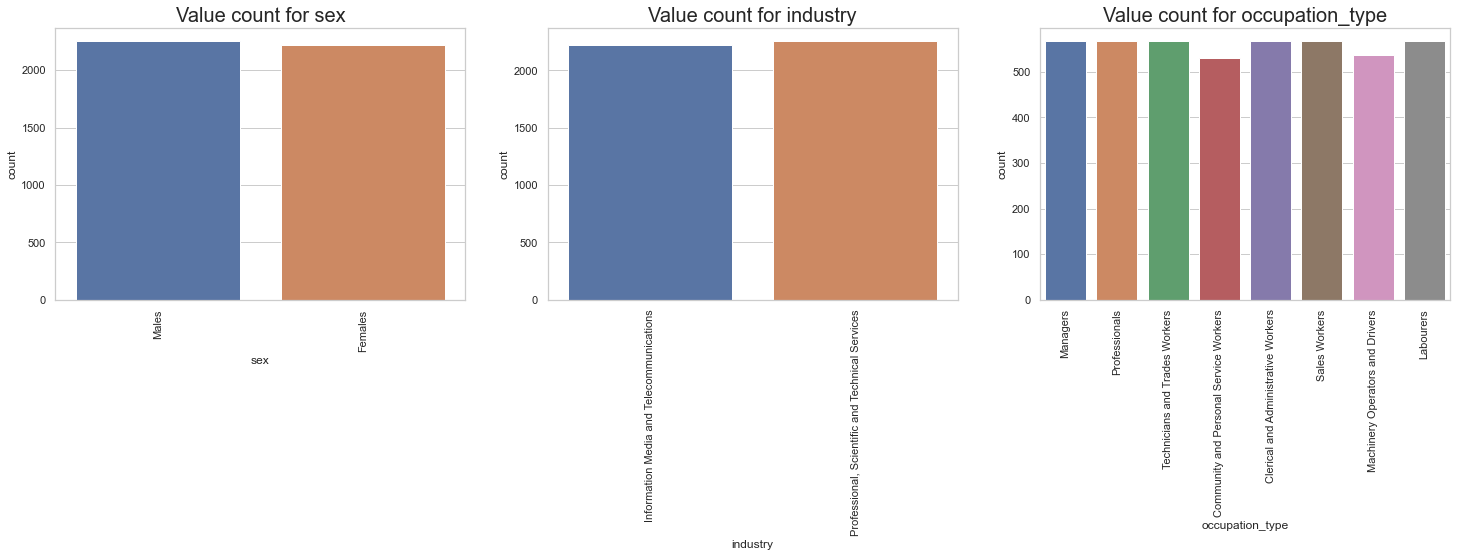

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style = 'whitegrid')

def plot_value_count(df, cols):
    '''
    This function plots a count of unique values in a column.
    Argument:
    df -- dataframe to supply the data
    cols -- list of column names 
    Return: None
    '''    
    fig, axes = plt.subplots(1, 3, figsize=(25,5))
    for i, col in enumerate(cols):   
        sns.countplot(x=df[col], ax= axes[i])
        axes[i].set_title('Value count for '+col, fontdict= dict(fontsize=20))
        axes[i].xaxis.set_tick_params(rotation=90)
    plt.show()

# value count plots for the first dataframe    
cols = ['sex', 'industry', 'occupation_type']
plot_value_count(df1, cols)

The above plots give us an idea of how our values in our column look like in the dataset. We can see there is a variation in value counts for different columns. For e.g. Community and personal service workers are less in our dataset.

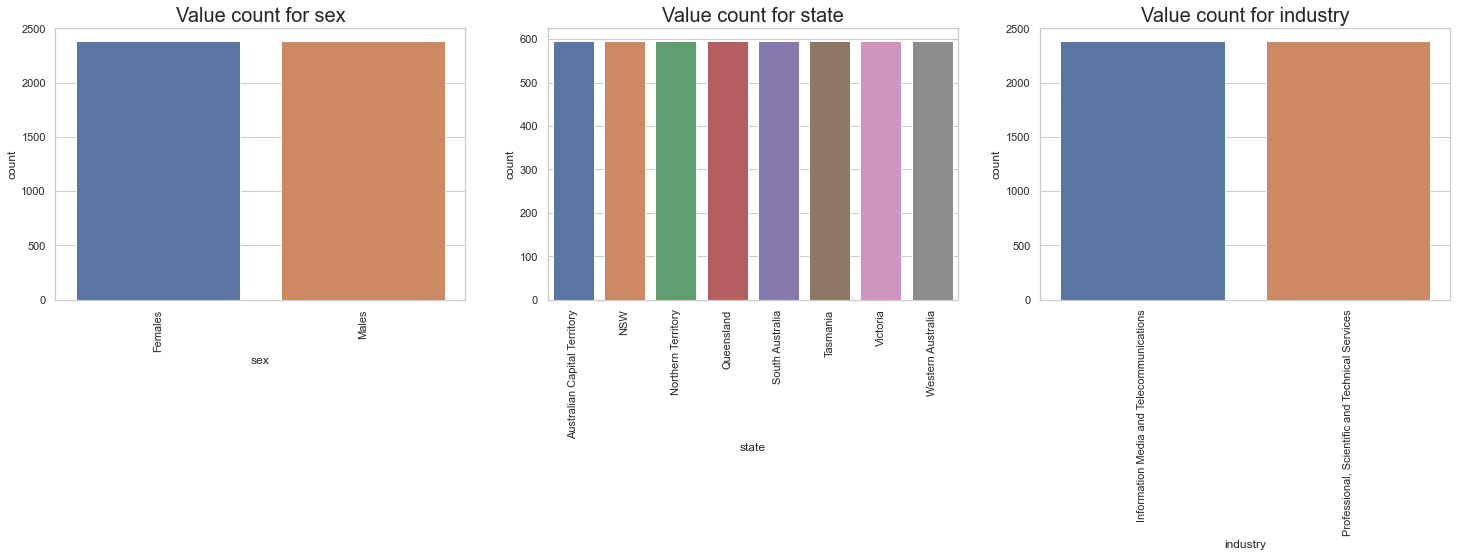

In [20]:
# value count plots for the second dataframe    
cols = ['sex', 'state', 'industry']
plot_value_count(df2, cols)

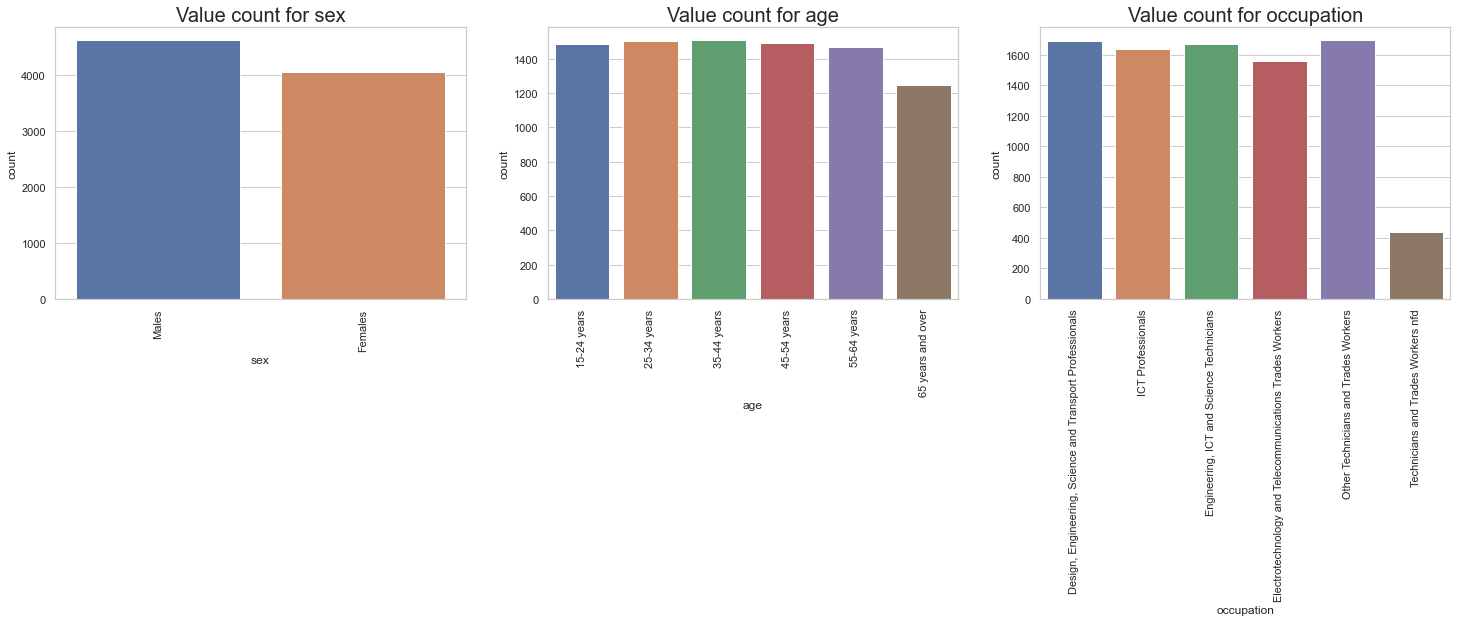

In [21]:
# value count plots for the third dataframe    
cols = ['sex', 'age', 'occupation']
plot_value_count(df3, cols)

From the above count plot for sex we can see that the figures for both male and female are higher as compared to the first same plot for the first two dataframes. This indicates that some of the tech occupations we selected contain non tech people. However, we assume that each occupation in the third dataframe consists of only tech people which is one of the limitations in our analysis.

**Gender Analysis:** For this analysis we use the data for the last five years.

In [22]:
# generating the dataset suitable to the visualisation type

# selecting data beyond November 2015
df1_last5_sex = df1[df1['date'] > '2015-11-01']
# getting the actual numerical data type of columns for aggregation later
df1_last5_sex = df1_last5_sex.infer_objects()
# grouping by gender
df1_last5_sex1 = df1_last5_sex.groupby('sex').mean().reset_index()

# generating a multiindex dataframe that divides gender by each occupation type
df1_last5_sex2 = df1_last5_sex.groupby(['sex','occupation_type']).mean().unstack(level=1)
df1_last5_sex2 = df1_last5_sex2['total_employees']

*Figure 1*

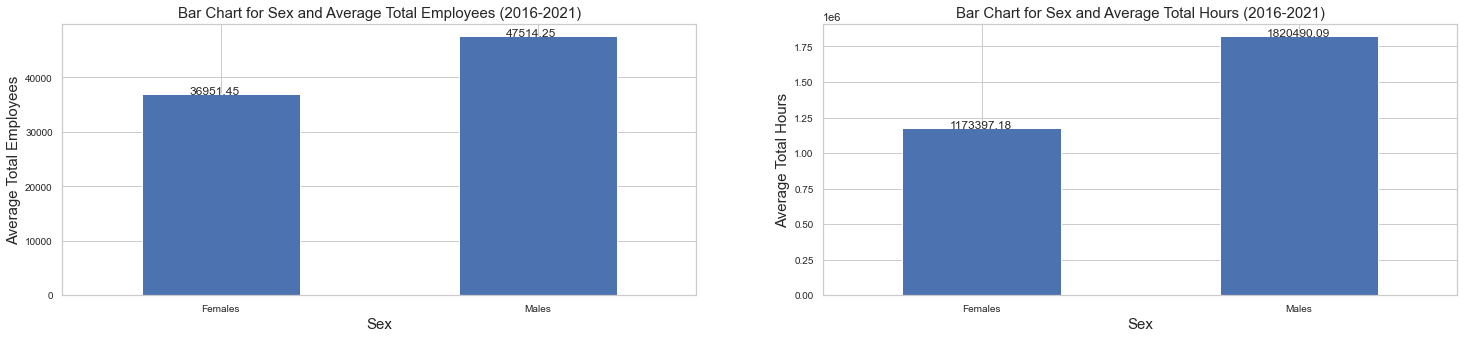

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(25,5))

# plotting sex vs average total employees
ax1 = df1_last5_sex1[['sex','total_employees']].plot(kind='bar', ax=axes[0],\
                                                  legend=False, fontsize=10, rot=0)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('Sex', fontsize=15)
ax1.set_xticklabels(df1_last5_sex1.sex)
ax1.set_title('Bar Chart for Sex and Average Total Employees (2016-2021)', fontsize=15)
# annotating the bars
x_offset = -0.1
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)  # formatting the values to decimal places      
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1))

# plotting sex vs average hours 
ax2 = df1_last5_sex1[['sex','total_hours']].plot(kind='bar', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0)
ax2.set_ylabel('Average Total Hours', fontsize=15)
ax2.set_xlabel('Sex', fontsize=15)
ax2.set_xticklabels(df1_last5_sex1.sex)
ax2.set_title('Bar Chart for Sex and Average Total Hours (2016-2021)', fontsize=15)
x_offset = -0.1
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)       
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1)) 
    
plt.show()

From the above plots, it is seen that there are more male employees. Interestingly, the gap between male and female regarding the total employees is not as large as compared to the gap for the average total hours performed on the job. So, this suggest that females are working more part time jobs than the males. 

*Figure 2*

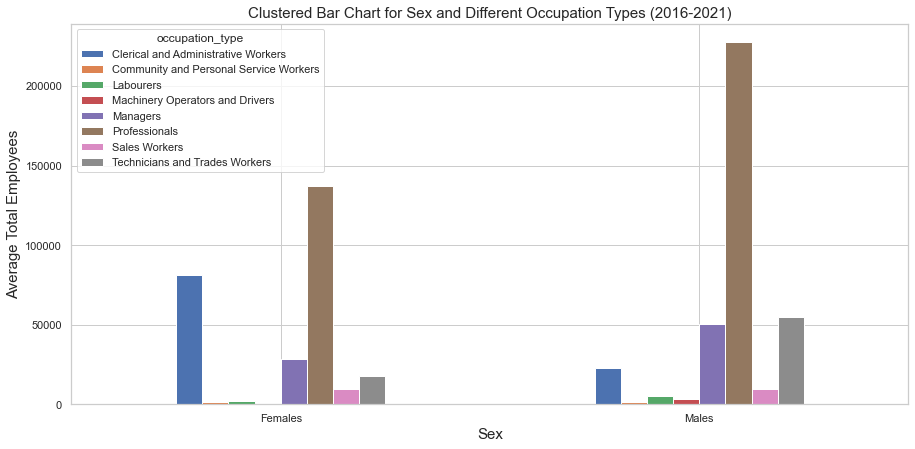

In [24]:
ax = df1_last5_sex2.plot(kind='bar', legend=True, figsize=(15,7), rot=0)
ax.set_ylabel('Average Total Employees', fontsize=15)
ax.set_xlabel('Sex', fontsize=15)
ax.set_title('Clustered Bar Chart for Sex and Different Occupation Types (2016-2021)', fontsize=15)
plt.show()

From the above plot, it is seen that the distribution of males and females are proportionately same in all occupation types except for clerical and administrative workers where more proportions of females are higher than males. Also, this occupation type is the second most popular among females. Thus, in the tech industry more females are taking either professional roles or clerical and administrative roles.

**Age Analysis:** For this analysis too, we take the average values for the last 5 years.

In [25]:
# making data presentation compatible to the type of visualisations used in this analysis
df3_last5_age = df3[df3['date'] > '2015-11-01']
df3_last5_age = df3_last5_age.infer_objects()
df3_last5_age1 = df3_last5_age.groupby('age').mean().reset_index()

*Figure 3*

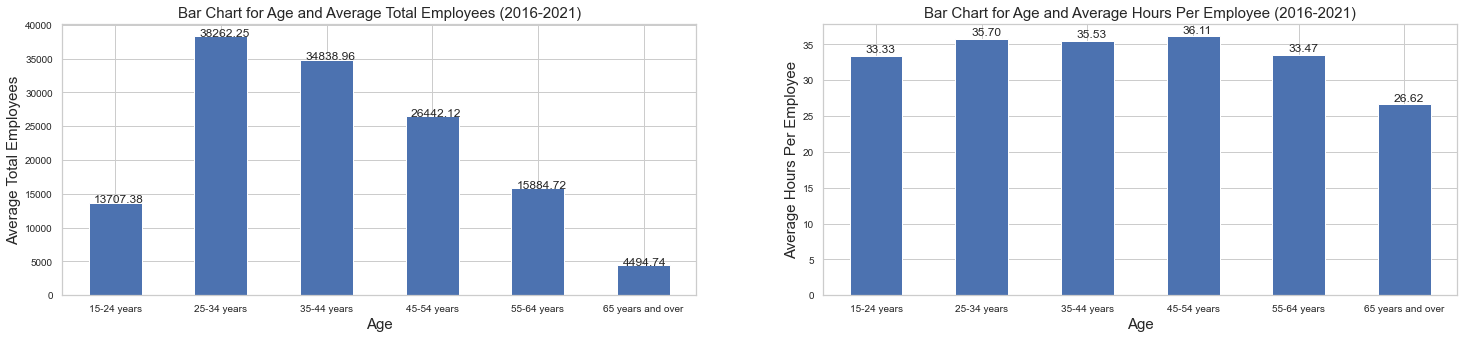

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(25,5))

# plotting age vs average total employees
ax1 = df3_last5_age1[['age','total_employees']].plot(kind='bar', ax=axes[0],\
                                                  legend=False, fontsize=10, rot=0)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_xticklabels(df3_last5_age1.age)
ax1.set_title('Bar Chart for Age and Average Total Employees (2016-2021)', fontsize=15)
x_offset = -0.2
y_offset = 0.1
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# plotting age vs hours per employee
ax2 = df3_last5_age1[['age','hours_per_employee']].plot(kind='bar', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0)
ax2.set_ylabel('Average Hours Per Employee', fontsize=15)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_xticklabels(df3_last5_age1.age)
ax2.set_title('Bar Chart for Age and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = -0.1
y_offset = 0.5
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)      
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

**Insights:**

From the first graph it is observed that the employee participation in the workforce increases after age 24 but the participation rate continue decreasing after reaching an age of 35 years. Firstly, this may be as people get older they acquire more skills and experience which lead them to acquire higher positions in the company and those top positions are limited. The people who could not upgrade themselves in terms of skills and experience might be displaced by the newer talents. This signals us that to climb the ladder in the tech industry, one has to improve one's skills continuously to reach the top position in the industry. Secondly, the low participation rate among the 65 plus age group might be the retirement. From a business perspective, a company can set up training programs to upskill a person who is already working in a tech occupation to expedite the promotion in their company and to keep them relevant in the industry.  

From the second figure we can see that the top positions are acquired by the 45-54 year age group as their average hrs per employee is higher than the other groups which means the kind of skills and expertise they hold is not present among other people so they are required most in their companies. 

**Occupation Analysis:**

In [28]:
df3['date'] =  pd.to_datetime(df3['date'])
# pivoting the data to create date as an index
df3_occupation = df3.groupby(['date', 'occupation']).sum().unstack()['total_employees']
df3_occupation.index.year

Int64Index([1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988,
            ...
            2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=142)

*Figure 4*

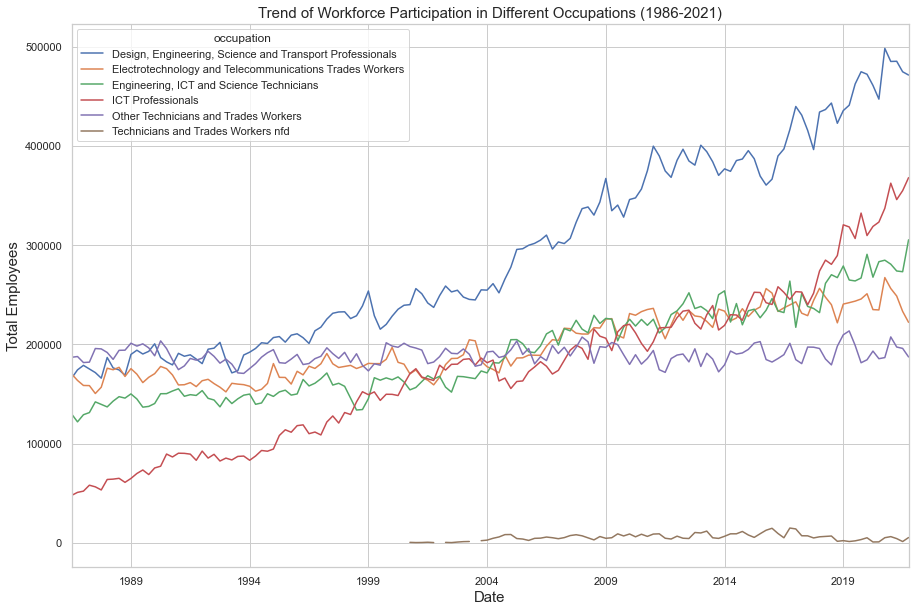

In [29]:
ax = df3_occupation.plot(figsize=(15,10))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Workforce Participation in Different Occupations (1986-2021)', fontsize=15)
plt.show()

From the above chart, we can see an upward trend for three job groups. They are design, engineering, science and transport professionals, engineering, ICT and science technicians and ICT professionals. The remaining groups are showing somewhat of a static trend. The plots for the occupation groups seem irregular due to the presence of some seasonality in them. Smoothing or adjusting them seasonally can remove those irregularities.

In [30]:
df3_last5_occ = df3[df3['date'] > '2015-11-01']
df3_last5_occ = df3_last5_occ.infer_objects()
df3_last5_occ = df3_last5_occ.groupby('occupation').mean().reset_index()

df3_last5_age2 = df3_last5_age.groupby(['age','occupation']).mean().unstack(level=1)
df3_last5_age2 = df3_last5_age2['total_employees']

*Figure 5*

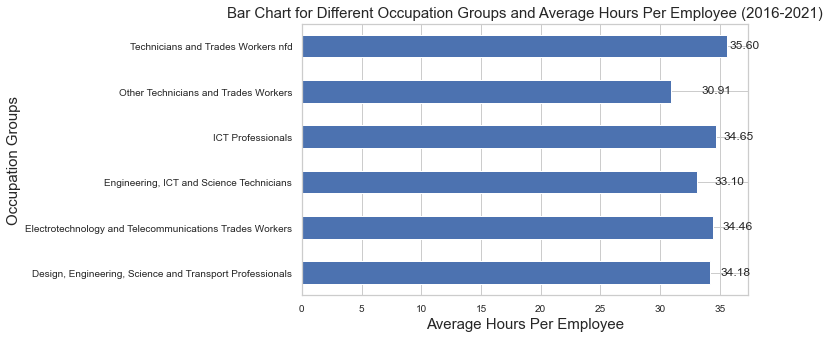

In [31]:
# plotting occupation vs average hours per employee
ax1 = df3_last5_occ[['occupation','hours_per_employee']].plot(kind='barh',\
                                                  legend=False, fontsize=10, rot=0, figsize=(8,5))
ax1.set_xlabel('Average Hours Per Employee', fontsize=15)
ax1.set_ylabel('Occupation Groups', fontsize=15)
ax1.set_yticklabels(df3_last5_occ.occupation)
ax1.set_title('Bar Chart for Different Occupation Groups and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = 18
y_offset = -0.3
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.x1 + b.x0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

The hours per employee for various occupation groups are in a similar range except for other technicians (30.91) which is the lowest one and technicians and trades workers (35.60) which is the highest one.

*Figure 6*

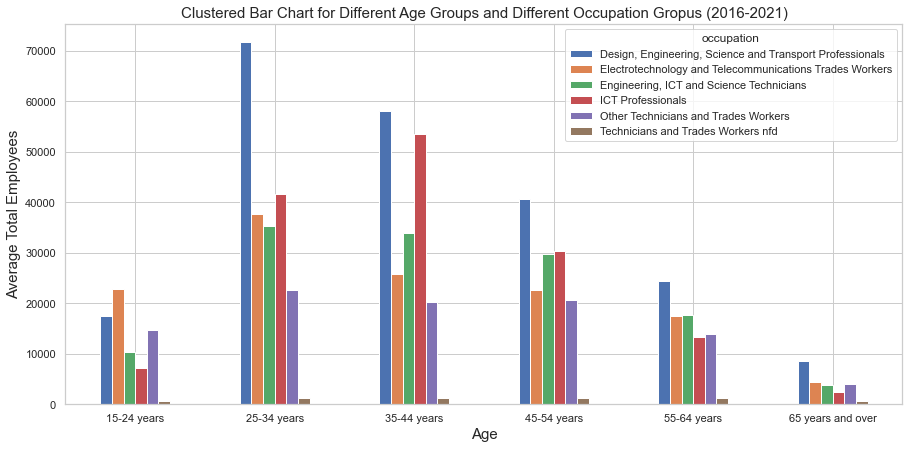

In [32]:
ax = df3_last5_age2.plot(kind='bar', legend=True, figsize=(15,7), rot=0)
ax.set_ylabel('Average Total Employees', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
ax.set_title('Clustered Bar Chart for Different Age Groups and Different Occupation Gropus (2016-2021)', fontsize=15)
plt.show()

**Insights**:

In figure 6, the proportionate distribution of people in each category for various occupation groups are fairly the same. However, in the age bracket 15-24, electrotechnology and telecommunications trades workers are higher than the remaining categories. From figure 5, it was established that the average hours per employees are almost the same except for two occupation groups. Although many young people are interested in the electrotechnology sector, the demand in this sector is not high. If it was high then the hours per employee should be higher than the other occupation groups which is not the case as seen in figure 5. So, if these young people do not change want to change their job in the near future then they might have a difficulty in finding work in their preferred field as the demand is not high for that job. Moreover, in figure 4, we can see that the job trend for the electrotechnology sector is fairly static. Thus, the better path for those young people would be choosing one out of the three growing sectors. To be precise, thinking of a career in the ICT professional sector would be wise as this secor is rapidly growing in the last three years as seen in figure 4, and the hours per employee in this sector is higher than the other two growing occupation groups which further solidifies the point that this sector is booming in the future too.  

**Location Analysis:**

In [33]:
df2['date'] =  pd.to_datetime(df2['date'])
df2_state = df2.groupby(['date', 'state']).sum().unstack()['total_employees']

df2_last5_state = df2[df2['date'] > '2015-11-01']
# creating a column with constant value
df2_last5_state1 = df2_last5_state.assign(loc='State')
df2_last5_state1 = df2_last5_state1.groupby(['loc','state'])['total_employees'].mean().unstack()
# sorting the columns based on the first row values
df2_last5_state1 = df2_last5_state1.sort_values(by=df2_last5_state1.index[0], ascending=True, axis=1)

df2_last5_state2 = df2_last5_state.groupby('state').mean().reset_index()

*Figure 7*

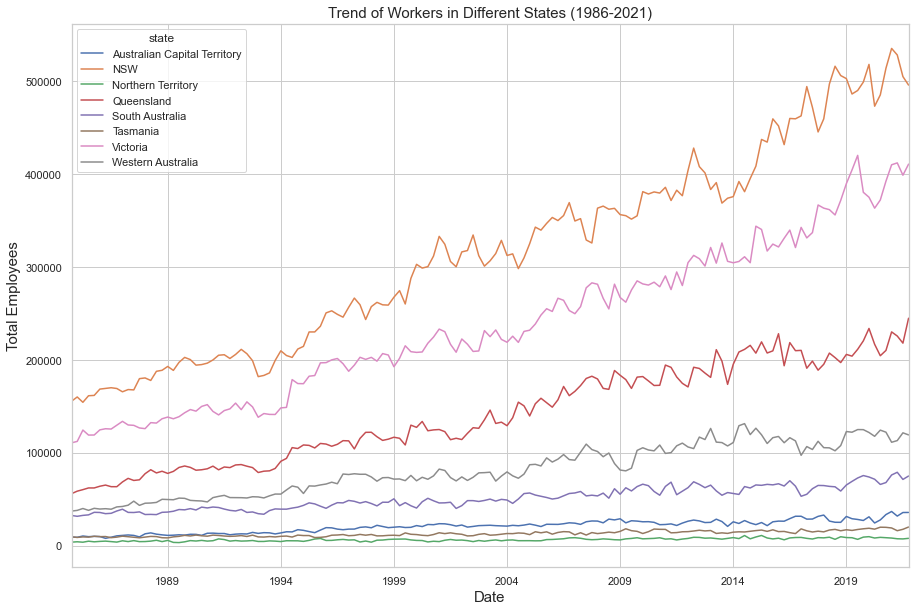

In [34]:
ax = df2_state.plot(figsize=(15,10))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Workers in Different States (1984-2021)', fontsize=15)
plt.show()

The trend of workforce growth is upward for five states with NSW and Victoria rising swiflty followed by Queensland while the growth is static for Northern Territory and Tasmania. 

*Figure 8*

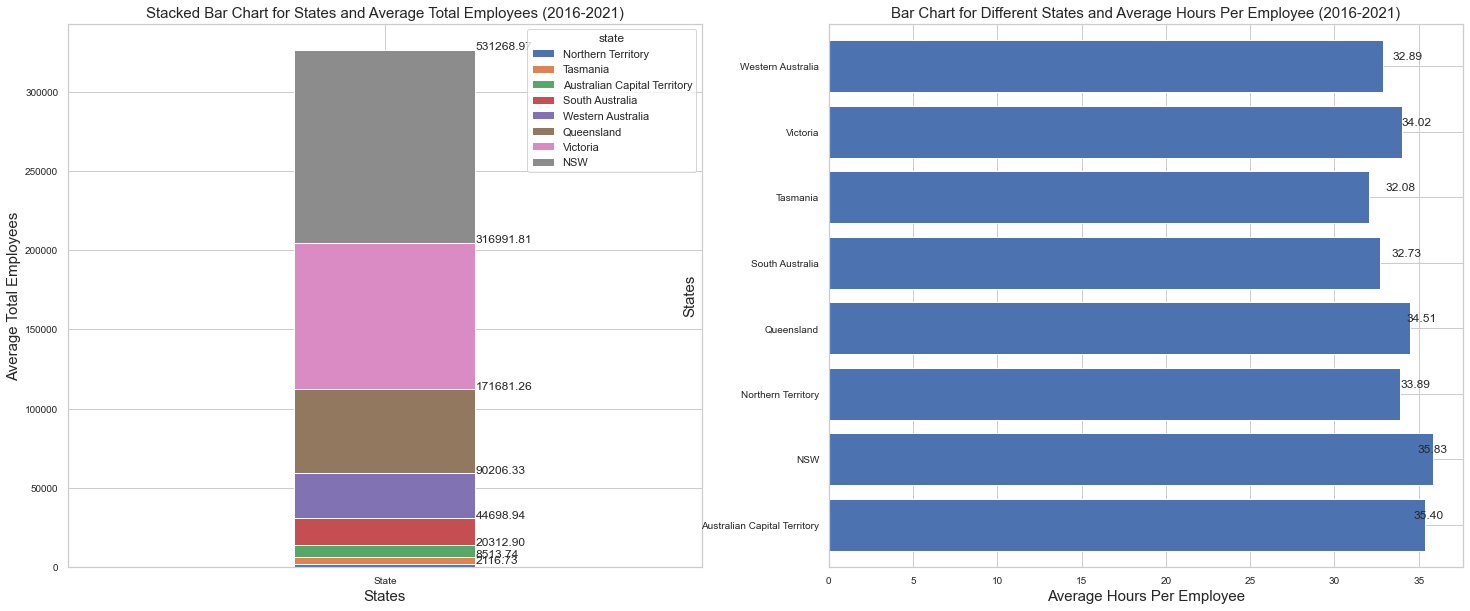

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

# plotting state vs average total employees
ax1 = df2_last5_state1.plot(kind='bar', ax=axes[0],\
                                                  legend=True, fontsize=10, rot=0, stacked=True, width=0.2)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('States', fontsize=15)
ax1.set_title('Stacked Bar Chart for States and Average Total Employees (2016-2021)', fontsize=15)
x_offset = 0.1
y_offset = 0.4
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# plotting occupation vs average hours per employee
ax2 = df2_last5_state2[['state','hours_per_employee']].plot(kind='barh', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0, width=0.8)
ax2.set_xlabel('Average Hours Per Employee', fontsize=15)
ax2.set_ylabel('States', fontsize=15)
ax2.set_yticklabels(df2_last5_state2.state)
ax2.set_title('Bar Chart for Different States and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = 17
y_offset = -0.3
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.x1 + b.x0)        
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

**Insights:**

From the above bar chart between states and average hours per employee, it is seen that NSW and Australian Capital Territory (ACT) had the two highest average hours per employee figures. Even though NSW had the highest number of workers among other states, as seen in the stacked bar chart, the demand for tech roles are still high in that state as the hours per employee figure is the highest. Also, from figure 7, it can be seen that the trend of employee participation in the workforce is rapidly growing in NSW. Likewise, ACT had the highest hours per employee rate but the workforce in that territory is not big as NSW as seen in the stacked bar chart. This suggest that there are many positions in the tech industry in ACT that are vacant and covered by the existing employees. From figure 7, it is seen that the trend for ACT is upward but in a gradual manner. Putting the insights together, the reason for ACT not being able to show a rapid growth like NSW inspite of similar rate of demands might be due to some extra requirements for people to work in the ACT tech industries such as security clearances.

On the other hand, Tasmania had low employee participation and low hours per employee in the past five years, and the trend for this state is static. So, Tasmania need some major projects to be able to employ more people in the tech industry.

To sum up, tech jobs are high in demand in NSW and ACT but low in Tasmania. Anyone looking for a tech career can think of working in NSW but if that person can fulfill the extra requirements then the job prospect is good in ACT too. Furthermore, from the insights obtained through above visuals, tech career in Tasmania is difficult to achieve.

**Work Load Analysis:**

In [98]:
df1['date'] =  pd.to_datetime(df1['date'])
df1_occupation_type = df1.groupby(['date', 'occupation_type']).sum().unstack()['hours_per_employee']

*Figure 9*

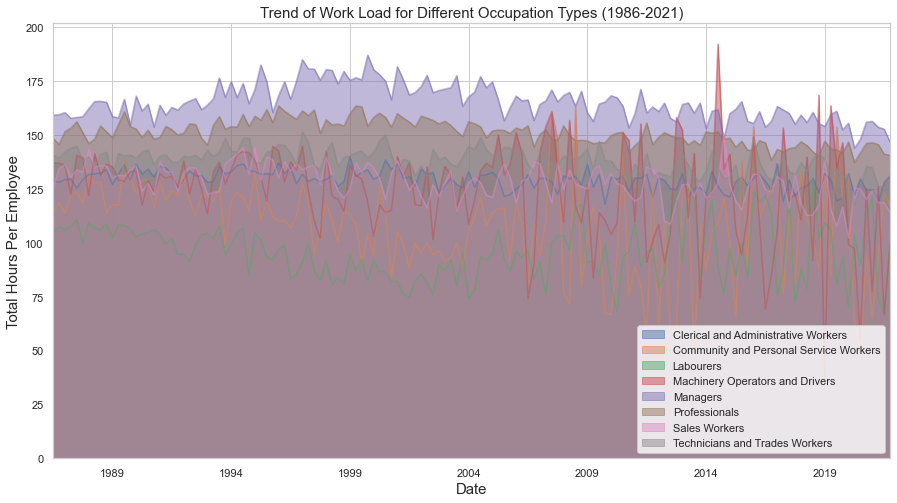

In [62]:
ax = df1_occupation_type.plot(kind='area', figsize=(15,8), stacked=False)
ax.set_ylabel('Total Hours Per Employee', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Work Load for Different Occupation Types (1986-2021)', fontsize=15)
plt.legend(loc='lower right')
plt.show()

**Insights:**

The above graph is not easy to analyse individual trends, and too many fluctuations can be seen in the graph as the data is not adjusted for seasonality. We will adjust the seasonality part in the later part of the analysis. Regarding the insights, we can clearly see that managers had the most highest workload among all occupation types over the years. The positive part is that with time the workload has been gradually declining but still taking up the top position in terms of the workload. So, currently, if we are appointing a person as a manager then a thorough assessment about skills, experience and the capacity to handle high amount of workload needs to be performed before the appointment.

In [99]:
from itertools import cycle

df1_occupation_type2 = df1.groupby(['date', 'occupation_type']).mean().unstack()['hours_per_employee']
# creating a new column quarter that represents the quarter in a year 
quarter = cycle(['Q3', 'Q4', 'Q1', 'Q2'])
df1_occupation_type2['quarter'] = [next(quarter) for x in range(len(df1_occupation_type))]
df1_occupation_type2 = df1_occupation_type2.groupby('quarter').mean()

*Figure 10*

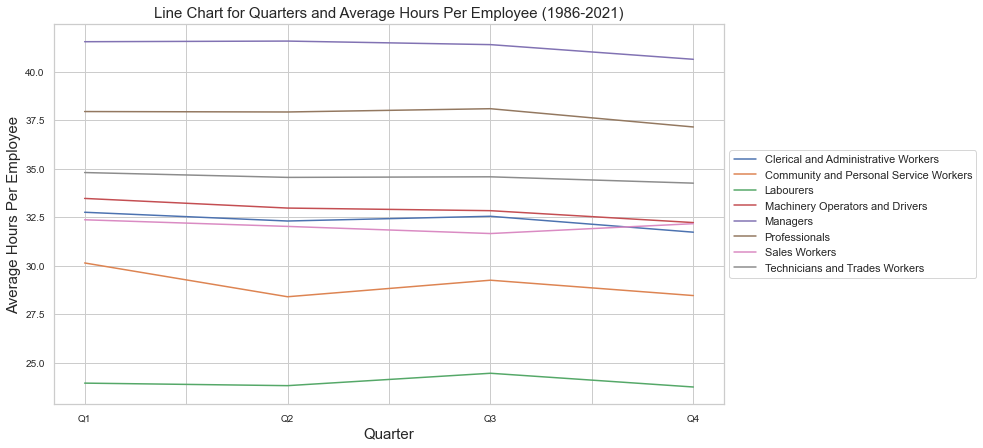

In [101]:
# plotting quarters vs hours per employee
ax = plt.subplot(111)
ax1 = df1_occupation_type2.plot.line(legend=True, ax=ax, fontsize=10, rot=0, figsize=(15,7))
# shrinking current axis by 20% to put the legend information in that 20% space
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# specifying the position of the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel('Average Hours Per Employee', fontsize=15)
ax1.set_xlabel('Quarter', fontsize=15)
ax1.set_title('Line Chart for Quarters and Average Hours Per Employee (1986-2021)', fontsize=15)
plt.show()

**Insights:**

From the above plot it is observed that the hours per employee is higher in the third quarter except for the sales workers in the tech industry. To reduce some of the workload of the employees, quarter 3 can be the suitable time to hire interns who are willing to learn and practise the tech trade. For sales department, fourth quarter is the best time to hire new interns.

## Forecasting:

In [14]:
# for forecasting purpose, we use the first dataset
from itertools import cycle
import copy
df_forecast = copy.deepcopy(df1)

def forecast_maker(df, industry):
    '''
    This function takes a dataframe and convert that dataframe with columns containing necessary values for forecasting.
    Argument:
    df -- the dataframe that is used to generate forecast dataframe 
    industry -- the name of the industry to generate the forecast dataframe for that industry
    Return: Dataframe
    '''
    
    # selecting the relevant columns
    df = df[['date', 'industry', 'fulltime_employees', 'parttime_employees']]
    # selecting the industry type
    df = df.loc[df['industry'] == industry]
    # calculating the total employees
    df.loc[:,'total_employees'] =  df['fulltime_employees'] + df['parttime_employees']
    # merging the data to get a unique value for a particular date 
    df = df.groupby(['date']).sum().reset_index()
    # creating a new column quarter that represents the quarter in a year 
    quarter = cycle([3,4,1,2])
    df['quarter'] = [next(quarter) for x in range(len(df))]
    # selecing only the columns that are required for forecasting
    df = df[['quarter','date','total_employees']]
    return df

In [15]:
# getting the forecast suitable dataframe for both industries
df_forecast_imt = forecast_maker(df_forecast, 'Information Media and Telecommunications')
df_forecast_imt

,quarter,date,total_employees
0,3,1986-08-01,170173.78
1,4,1986-11-01,164834.66
2,1,1987-02-01,163059.79
3,2,1987-05-01,165700.53
4,3,1987-08-01,165406.40
...,...,...,...
137,4,2020-11-01,192747.04
138,1,2021-02-01,201291.00
139,2,2021-05-01,181544.52
140,3,2021-08-01,184316.39


In [16]:
df_forecast_pst = forecast_maker(df_forecast, 'Professional, Scientific and Technical Services')
df_forecast_pst

,quarter,date,total_employees
0,3,1986-08-01,286949.54
1,4,1986-11-01,302028.94
2,1,1987-02-01,314842.21
3,2,1987-05-01,311554.84
4,3,1987-08-01,313082.86
...,...,...,...
137,4,2020-11-01,1177417.79
138,1,2021-02-01,1227343.38
139,2,2021-05-01,1233672.80
140,3,2021-08-01,1192597.44
